## CI6227 Assignment ##

Installing the open source Yandex CatBoost package

In [2]:
!pip install catboost

    100% |################################| 2.8MB 457kB/s eta 0:00:01


Importing the required packaged: Numpy, Pandas, Matplotlib, Seaborn, Scikit-learn and CatBoost

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# plt.style.use('ggplot') 
import seaborn as sns
from catboost import Pool, CatBoostClassifier, cv, CatboostIpythonWidget
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold

Loading of [IBM HR Dataset](https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset/data) into pandas dataframe

In [4]:
ibm_hr_df = pd.read_csv("/home/nbuser/library/IBM-HR-Employee-Attrition.csv")

### Part 1a: Data Exploration - Summary Statistics ###

Getting the summary statistics of the IBM HR dataset

In [5]:
ibm_hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


Zooming in on the summary statistics of irrelevant attributes __*EmployeeCount*__ and __*StandardHours*__

In [6]:
irrList = ['EmployeeCount', 'StandardHours'] 
ibm_hr_df[irrList].describe()

,EmployeeCount,StandardHours
count,1470.0,1470.0
mean,1.0,80.0
std,0.0,0.0
min,1.0,80.0
25%,1.0,80.0
50%,1.0,80.0
75%,1.0,80.0
max,1.0,80.0


Zooming in on the summary statistics of irrelevant attribute __*Over18*__ 

In [7]:
ibm_hr_df["Over18"].value_counts()

Y    1470
Name: Over18, dtype: int64

From the summary statistics, one could see that attributes __*EmployeeCount*__, __*StandardHours*__ and __*Over18*__ holds only one single value for all of the 1470 records <br>

__*EmployeeCount*__ only holds a single value - 1.0 <br>
__*StandardHours*__ only holds a single value - 80.0 <br>
__*Over18*__        only holds a single value - 'Y'  <br>

These irrelevant attributes are duely dropped from the dataset

### Part 1b: Data Exploration - Missing Values and Duplicate Records ###

Checking for 'NA' and missing values in the dataset.

In [8]:
ibm_hr_df.isnull().sum(axis=0)

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

Well, we got lucky here, there isn't any missing values in this dataset

Next, let's check for the existence of duplicate records in the dataset

In [9]:
ibm_hr_df.duplicated().sum()

0

There are also no duplicate records in the dataset

Converting __*OverTime*__ binary categorical attribute to {1, 0}

In [10]:
ibm_hr_df['OverTime'].replace(to_replace=dict(Yes=1, No=0), inplace=True)

### Part 2a: Data Preprocessing - Removal of Irrelevant Attributes ###

In [12]:
ibm_hr_df = ibm_hr_df.drop(['EmployeeCount', 'StandardHours', 'Over18'], axis=1)

### Part 2b: Data Preprocessing - Feature Subset Selection - Low Variance Filter  ###

Performing variance analysis

Performing Pearson correlation analysis between attributes to aid in dimension reduction

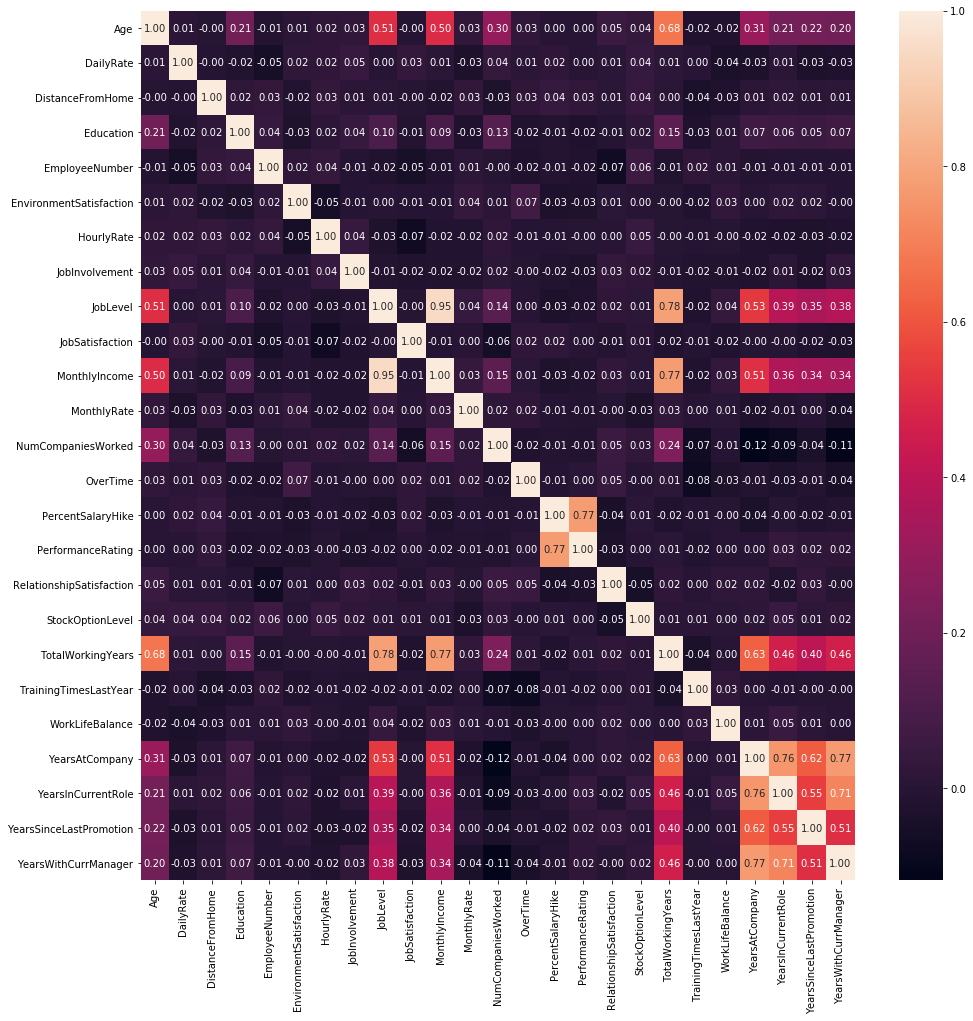

In [15]:
plt.figure(figsize=(16,16))
sns.heatmap(ibm_hr_df.corr(), annot=True, fmt=".2f")

plt.show()

Performing variance analysis to aid in dimension reduction

In [16]:
variance_x = ibm_hr_df.drop('Attrition', axis=1)
variance_one_hot = pd.get_dummies(variance_x)

In [17]:
#Normalise the dataset. This is required for getting the variance threshold
scaler = MinMaxScaler()
scaler.fit(variance_one_hot)
MinMaxScaler(copy=True, feature_range=(0, 1))
scaled_variance_one_hot = scaler.transform(variance_one_hot)

In [18]:
#Set the threshold values and run VarianceThreshold 
thres = .85* (1 - .85)
sel = VarianceThreshold(threshold=thres)
sel.fit(scaled_variance_one_hot)
variance = sel.variances_

In [19]:
#Sorting of the score in acsending orders for plotting
indices = np.argsort(variance)[::-1]
feature_list = list(variance_one_hot)
sorted_feature_list = []
thres_list = []
for f in range(len(variance_one_hot.columns)):
    sorted_feature_list.append(feature_list[indices[f]])
    thres_list.append(thres)

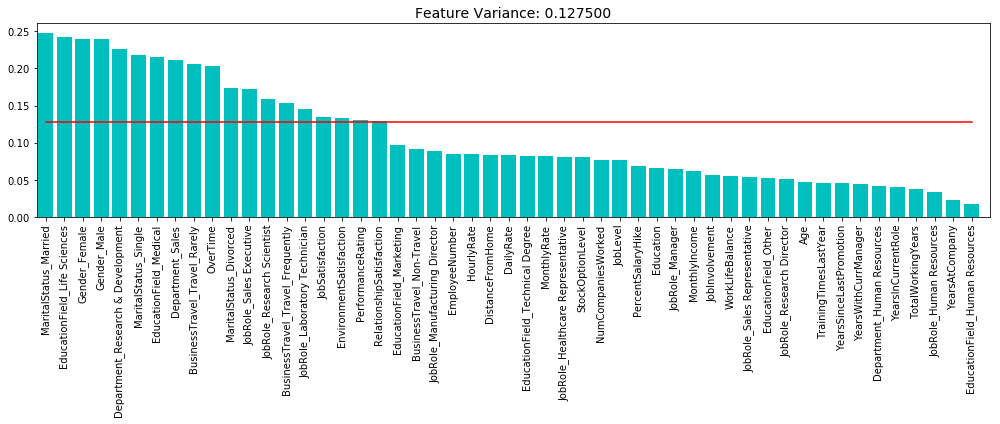

In [20]:
plt.figure(figsize=(14,6))
plt.title("Feature Variance: %f" %(thres), fontsize = 14)
plt.bar(range(len(variance_one_hot.columns)), variance[indices], color="c")
plt.xticks(range(len(variance_one_hot.columns)), sorted_feature_list, rotation = 90)
plt.xlim([-0.5, len(variance_one_hot.columns)])
plt.plot(range(len(variance_one_hot.columns)), thres_list, "k-", color="r")
plt.tight_layout()
plt.show()

Performing Pearson correlation analysis between attributes to aid in dimension reduction

### Part 3 ###

In [21]:
rAttrList = ['Department', 'OverTime', 'HourlyRate',
             'StockOptionLevel', 'DistanceFromHome',
             'YearsInCurrentRole', 'Age']

In [22]:
#keep only the attribute list on rAttrList
label_hr_df = ibm_hr_df[rAttrList]

In [23]:
#convert continous attribute DistanceFromHome to Catergorical
#: 1: near, 2: mid distance, 3: far
maxValues = label_hr_df['DistanceFromHome'].max()
minValues = label_hr_df['DistanceFromHome'].min()
intervals = (maxValues - minValues)/3
bins = [0, (minValues + intervals), (maxValues - intervals), maxValues]
groupName = [1, 2, 3]
label_hr_df['CatDistanceFromHome'] = pd.cut(label_hr_df['DistanceFromHome'], bins, labels = groupName)

/home/nbcommon/anaconda2_410/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [24]:
# convert col type from cat to int64
label_hr_df['CatDistanceFromHome'] = pd.to_numeric(label_hr_df['CatDistanceFromHome']) 
label_hr_df.drop(['DistanceFromHome'], axis = 1, inplace = True)

/home/nbcommon/anaconda2_410/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/home/nbcommon/anaconda2_410/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [25]:
#replace department into 0 & 1, 0: R&D, and 1: Non-R&D
label_hr_df['Department'].replace(['Research & Development', 'Human Resources', 'Sales'],
                                  [0, 1, 1], inplace = True)

/home/nbuser/anaconda2_410/lib/python2.7/site-packages/pandas/core/generic.py:3554: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [26]:
#normalise data
label_hr_df_norm = (label_hr_df - label_hr_df.min()) / (label_hr_df.max() - label_hr_df.min())

In [27]:
#create a data frame for the function value and class labels
value_df = pd.DataFrame(columns = ['ClassValue'])

In [28]:
#compute the class value
for row in range (0, ibm_hr_df.shape[0]):
    if label_hr_df_norm['Department'][row] == 0:
        value = 0.3 * label_hr_df_norm['HourlyRate'][row] - 0.2 * label_hr_df_norm['OverTime'][row] + \
            - 0.2 * label_hr_df_norm['CatDistanceFromHome'][row] + 0.15 * label_hr_df_norm['StockOptionLevel'][row] + \
            0.1 * label_hr_df_norm['Age'][row] - 0.05 * label_hr_df_norm['YearsInCurrentRole'][row]
    
    else:
        value = 0.2 * label_hr_df_norm['HourlyRate'][row] - 0.3 * label_hr_df_norm['OverTime'][row] + \
            - 0.15 * label_hr_df_norm['CatDistanceFromHome'][row] + 0.2 * label_hr_df_norm['StockOptionLevel'][row] + \
            0.05 * label_hr_df_norm['Age'][row] - 0.1 * label_hr_df_norm['YearsInCurrentRole'][row]
    value_df.loc[row] = value

In [29]:
# top 500 highest class value is satisfied with their job
v1 = value_df.sort_values('ClassValue', ascending = False).reset_index(drop = True)\
        ['ClassValue'][499]
# next top 500 is neutral
v2 = value_df.sort_values('ClassValue', ascending = False).reset_index(drop = True)\
        ['ClassValue'][999]
# rest is unsatisfied

In [30]:
label_df = pd.DataFrame(columns = ['ClassLabel'])

In [31]:
#compute the classlabel
for row in range (0, value_df.shape[0]):
    if value_df['ClassValue'][row] >= v1:
        cat = "Satisfied"
    elif value_df['ClassValue'][row] >= v2:
        cat = "Neutral"
    else:
        cat = "Unsatisfied"
    label_df.loc[row] = cat

In [32]:
df = pd.concat([ibm_hr_df, label_df], axis = 1)

### Part 3: Classification with CatBoost ###

In [26]:
#df = pd.read_csv("/home/nbuser/library/HR_dataset_generated_label.csv")

In [33]:
df = df[['Age', 'Department', 'DistanceFromHome', 'HourlyRate', 'OverTime', 'StockOptionLevel', 
         'MaritalStatus', 'YearsInCurrentRole', 'EmployeeNumber', 'ClassLabel']]

Split dataset into attributes/features __*X*__ and label/class __*y*__

In [34]:
X = df.drop('ClassLabel', axis=1)
y = df.ClassLabel

Replacing label/class value from __*'Satisfied'*__, __*'Neutral'*__ and *__'Unsatisfied'__* to *__2__*, __*1*__ and __*0*__

In [35]:
y.replace(to_replace=dict(Satisfied=2, Neutral=1, Unsatisfied=0), inplace=True)

Performing __'one hot encoding'__ method

In [36]:
one_hot = pd.get_dummies(X)

Normalisation of features

In [37]:
one_hot = (one_hot - one_hot.mean()) / (one_hot.max() - one_hot.min())

In [38]:
categorical_features_indices = np.where(one_hot.dtypes != np.float)[0]

### Part 3a: Model training with CatBoost ###
Now lets split our data to train (70%) and test (30%) set:

In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(one_hot, y, train_size=0.7, random_state=1234)

In [44]:
model = CatBoostClassifier(
    custom_loss = ['Accuracy'],
    random_seed = 100,
    loss_function = 'MultiClass'
)

In [51]:
model.fit(
    X_train, y_train,
    cat_features = categorical_features_indices,
    verbose = True,  # you can uncomment this for text output
    #plot = True
)

'\nmodel.fit(\n    X_train, y_train,\n    cat_features = categorical_features_indices,\n    verbose = True,  # you can uncomment this for text output\n    #plot = True\n)\n'

In [48]:
feature_score = pd.DataFrame(list(zip(one_hot.dtypes.index, model.get_feature_importance(Pool(one_hot, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

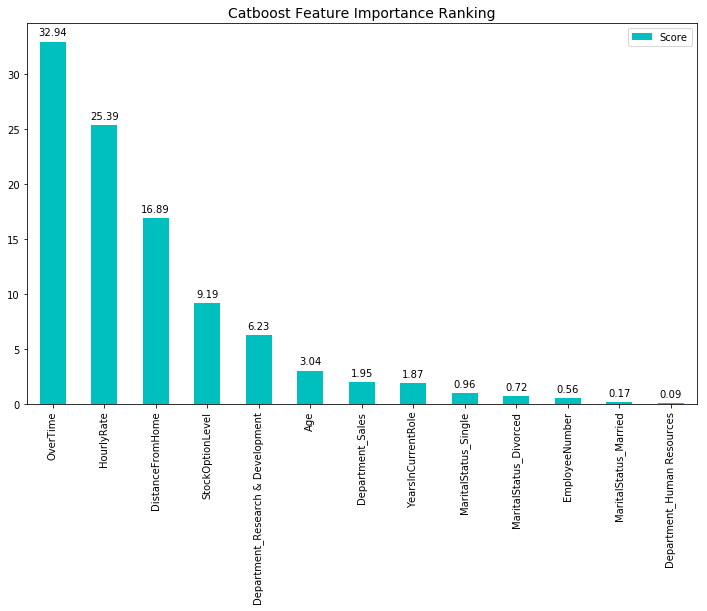

In [49]:
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

# get feature score as labels round to 2 decimal
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()

In [50]:
model.score(X_test, y_test)

0.92517006802721091

### Part 4: CatBoost Classifier Tuning ###

In [40]:
model = CatBoostClassifier(
    l2_leaf_reg = 3,
    iterations = 1000,
    fold_len_multiplier = 1.05,
    learning_rate = 0.05,
    custom_loss = ['Accuracy'],
    random_seed = 100,
    loss_function = 'MultiClass'
)

In [41]:
model.fit(
    X_train, y_train,
    cat_features = categorical_features_indices,
    verbose = True,  # you can uncomment this for text output
    #plot = True
)

Borders for float features generated
0:	learn -1.064919059	total: 88.1ms	remaining: 1m 28s
1:	learn -1.02506179	total: 136ms	remaining: 1m 7s
2:	learn -0.987600438	total: 179ms	remaining: 59.6s
3:	learn -0.9521302748	total: 229ms	remaining: 56.9s
4:	learn -0.9212409658	total: 265ms	remaining: 52.8s
5:	learn -0.8914720843	total: 312ms	remaining: 51.8s
6:	learn -0.8608445021	total: 361ms	remaining: 51.1s
7:	learn -0.8334836706	total: 401ms	remaining: 49.7s
8:	learn -0.8113218202	total: 442ms	remaining: 48.7s
9:	learn -0.7887240798	total: 483ms	remaining: 47.8s
10:	learn -0.7654734708	total: 525ms	remaining: 47.2s
11:	learn -0.7441723847	total: 563ms	remaining: 46.3s
12:	learn -0.7273213481	total: 616ms	remaining: 46.7s
13:	learn -0.7117720226	total: 633ms	remaining: 44.6s
14:	learn -0.6943642033	total: 675ms	remaining: 44.3s
15:	learn -0.6781659875	total: 709ms	remaining: 43.6s
16:	learn -0.6638900187	total: 747ms	remaining: 43.2s
17:	learn -0.6465621556	total: 790ms	remaining: 43.1s
18:

153:	learn -0.1990187017	total: 6.6s	remaining: 36.3s
154:	learn -0.1981845147	total: 6.64s	remaining: 36.2s
155:	learn -0.1974233261	total: 6.69s	remaining: 36.2s
156:	learn -0.1961223881	total: 6.73s	remaining: 36.2s
157:	learn -0.195301182	total: 6.78s	remaining: 36.1s
158:	learn -0.1939784544	total: 6.82s	remaining: 36.1s
159:	learn -0.1929118232	total: 6.87s	remaining: 36s
160:	learn -0.192322512	total: 6.9s	remaining: 36s
161:	learn -0.1912299223	total: 6.94s	remaining: 35.9s
162:	learn -0.1900594826	total: 6.99s	remaining: 35.9s
163:	learn -0.189036068	total: 7.03s	remaining: 35.8s
164:	learn -0.1883333476	total: 7.07s	remaining: 35.8s
165:	learn -0.1873241923	total: 7.11s	remaining: 35.7s
166:	learn -0.1863098329	total: 7.16s	remaining: 35.7s
167:	learn -0.1851933039	total: 7.2s	remaining: 35.6s
168:	learn -0.1841890443	total: 7.24s	remaining: 35.6s
169:	learn -0.1832924598	total: 7.29s	remaining: 35.6s
170:	learn -0.1825378591	total: 7.33s	remaining: 35.5s
171:	learn -0.181564

308:	learn -0.1094806185	total: 12.7s	remaining: 28.3s
309:	learn -0.1090662369	total: 12.7s	remaining: 28.3s
310:	learn -0.1087769668	total: 12.7s	remaining: 28.2s
311:	learn -0.1085211927	total: 12.8s	remaining: 28.2s
312:	learn -0.1081999593	total: 12.8s	remaining: 28.1s
313:	learn -0.1078410783	total: 12.9s	remaining: 28.1s
314:	learn -0.1075478269	total: 12.9s	remaining: 28.1s
315:	learn -0.1070670709	total: 12.9s	remaining: 28s
316:	learn -0.1068168936	total: 13s	remaining: 28s
317:	learn -0.1063309216	total: 13s	remaining: 27.9s
318:	learn -0.1059473894	total: 13.1s	remaining: 27.9s
319:	learn -0.1057537934	total: 13.1s	remaining: 27.8s
320:	learn -0.1053118474	total: 13.1s	remaining: 27.8s
321:	learn -0.1048831964	total: 13.2s	remaining: 27.7s
322:	learn -0.1044660297	total: 13.2s	remaining: 27.7s
323:	learn -0.1042507772	total: 13.3s	remaining: 27.7s
324:	learn -0.1039393046	total: 13.3s	remaining: 27.6s
325:	learn -0.1036737873	total: 13.3s	remaining: 27.6s
326:	learn -0.1032

460:	learn -0.07484184625	total: 18.3s	remaining: 21.4s
461:	learn -0.074725304	total: 18.4s	remaining: 21.4s
462:	learn -0.07453723056	total: 18.4s	remaining: 21.3s
463:	learn -0.07437966917	total: 18.4s	remaining: 21.3s
464:	learn -0.07424954439	total: 18.5s	remaining: 21.2s
465:	learn -0.07414933944	total: 18.5s	remaining: 21.2s
466:	learn -0.07406094322	total: 18.5s	remaining: 21.2s
467:	learn -0.07394300078	total: 18.6s	remaining: 21.1s
468:	learn -0.07373492331	total: 18.6s	remaining: 21.1s
469:	learn -0.07352786582	total: 18.7s	remaining: 21s
470:	learn -0.0733408863	total: 18.7s	remaining: 21s
471:	learn -0.07319340323	total: 18.7s	remaining: 21s
472:	learn -0.07294114512	total: 18.8s	remaining: 20.9s
473:	learn -0.07285316329	total: 18.8s	remaining: 20.9s
474:	learn -0.07263725254	total: 18.8s	remaining: 20.8s
475:	learn -0.0725250007	total: 18.9s	remaining: 20.8s
476:	learn -0.0723298634	total: 18.9s	remaining: 20.7s
477:	learn -0.07211513796	total: 18.9s	remaining: 20.7s
478

612:	learn -0.05578348203	total: 24.4s	remaining: 15.4s
613:	learn -0.05568102269	total: 24.5s	remaining: 15.4s
614:	learn -0.05557250193	total: 24.5s	remaining: 15.3s
615:	learn -0.0555328576	total: 24.6s	remaining: 15.3s
616:	learn -0.05542420604	total: 24.6s	remaining: 15.3s
617:	learn -0.05534587312	total: 24.6s	remaining: 15.2s
618:	learn -0.05529497757	total: 24.7s	remaining: 15.2s
619:	learn -0.05516434598	total: 24.7s	remaining: 15.1s
620:	learn -0.05499118593	total: 24.7s	remaining: 15.1s
621:	learn -0.05486684934	total: 24.8s	remaining: 15.1s
622:	learn -0.05479936079	total: 24.8s	remaining: 15s
623:	learn -0.05470669232	total: 24.8s	remaining: 15s
624:	learn -0.05460392865	total: 24.9s	remaining: 14.9s
625:	learn -0.05447300374	total: 24.9s	remaining: 14.9s
626:	learn -0.05437403874	total: 25s	remaining: 14.8s
627:	learn -0.0542838952	total: 25s	remaining: 14.8s
628:	learn -0.05423268183	total: 25s	remaining: 14.8s
629:	learn -0.0541400869	total: 25.1s	remaining: 14.7s
630:	

760:	learn -0.04367527473	total: 29.9s	remaining: 9.39s
761:	learn -0.04362754713	total: 29.9s	remaining: 9.35s
762:	learn -0.04358421424	total: 30s	remaining: 9.31s
763:	learn -0.04353561855	total: 30s	remaining: 9.27s
764:	learn -0.04345629096	total: 30s	remaining: 9.23s
765:	learn -0.04334540477	total: 30.1s	remaining: 9.19s
766:	learn -0.04330899771	total: 30.1s	remaining: 9.15s
767:	learn -0.04321971629	total: 30.2s	remaining: 9.11s
768:	learn -0.04316930122	total: 30.2s	remaining: 9.07s
769:	learn -0.04312539594	total: 30.2s	remaining: 9.03s
770:	learn -0.04300406215	total: 30.3s	remaining: 8.99s
771:	learn -0.04294255848	total: 30.3s	remaining: 8.95s
772:	learn -0.04288683824	total: 30.3s	remaining: 8.91s
773:	learn -0.04283321973	total: 30.4s	remaining: 8.87s
774:	learn -0.04276162519	total: 30.4s	remaining: 8.83s
775:	learn -0.04268241529	total: 30.4s	remaining: 8.79s
776:	learn -0.04264705662	total: 30.5s	remaining: 8.75s
777:	learn -0.04261359064	total: 30.5s	remaining: 8.7s

911:	learn -0.03565494923	total: 35.4s	remaining: 3.42s
912:	learn -0.03562654243	total: 35.5s	remaining: 3.38s
913:	learn -0.03559816177	total: 35.5s	remaining: 3.34s
914:	learn -0.03553960082	total: 35.6s	remaining: 3.3s
915:	learn -0.03547297757	total: 35.6s	remaining: 3.27s
916:	learn -0.03545633312	total: 35.7s	remaining: 3.23s
917:	learn -0.03542446051	total: 35.7s	remaining: 3.19s
918:	learn -0.03537686616	total: 35.7s	remaining: 3.15s
919:	learn -0.03534709935	total: 35.8s	remaining: 3.11s
920:	learn -0.03529966606	total: 35.8s	remaining: 3.07s
921:	learn -0.03525214764	total: 35.8s	remaining: 3.03s
922:	learn -0.03520054457	total: 35.9s	remaining: 2.99s
923:	learn -0.03516845966	total: 35.9s	remaining: 2.95s
924:	learn -0.03511636452	total: 35.9s	remaining: 2.91s
925:	learn -0.03503071045	total: 36s	remaining: 2.88s
926:	learn -0.0349593681	total: 36s	remaining: 2.84s
927:	learn -0.03491986084	total: 36.1s	remaining: 2.8s
928:	learn -0.03488467748	total: 36.1s	remaining: 2.76s

In [42]:
feature_score = pd.DataFrame(list(zip(one_hot.dtypes.index, model.get_feature_importance(Pool(one_hot, label=y, cat_features=categorical_features_indices)))),
                columns=['Feature','Score'])

In [43]:
feature_score = feature_score.sort_values(by='Score', ascending=False, inplace=False, kind='quicksort', na_position='last')

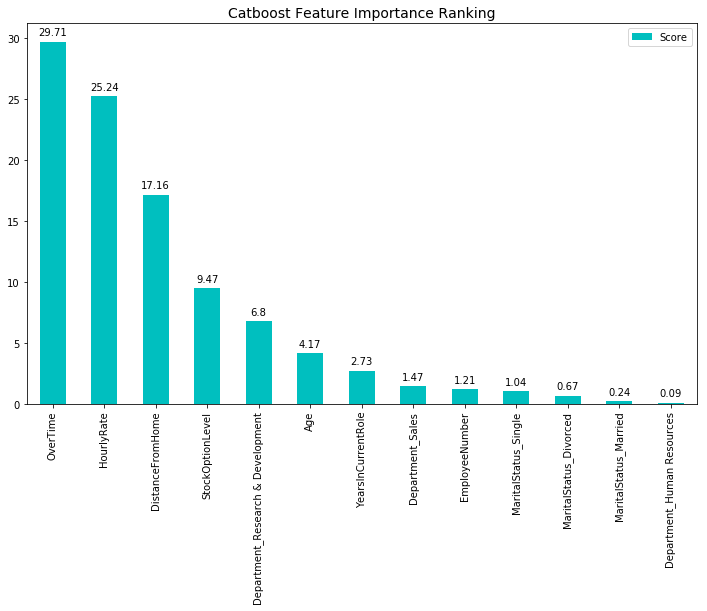

In [44]:
plt.rcParams["figure.figsize"] = (12,7)
ax = feature_score.plot('Feature', 'Score', kind='bar', color='c')
ax.set_title("Catboost Feature Importance Ranking", fontsize = 14)
ax.set_xlabel('')

rects = ax.patches

# get feature score as labels round to 2 decimal
labels = feature_score['Score'].round(2)

for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 0.35, label, ha='center', va='bottom')

plt.show()
#plt.savefig("image.png")

In [61]:
cm = pd.DataFrame()
cm['Satisfaction'] = y_test
cm['Predict'] = model.predict(X_test)

In [63]:
mappingSatisfaction = {0:'Unsatisfied', 1: 'Neutral', 2: 'Satisfied'}
mappingPredict = {0.0:'Unsatisfied', 1.0: 'Neutral', 2.0: 'Satisfied'}
cm = cm.replace({'Satisfaction': mappingSatisfaction, 'Predict': mappingPredict})

In [64]:
pd.crosstab(cm['Satisfaction'], cm['Predict'], margins=True)

Predict,Neutral,Satisfied,Unsatisfied,All
Satisfaction,,,,
Neutral,144,13,3,160
Satisfied,6,139,0,145
Unsatisfied,6,0,130,136
All,156,152,133,441


In [65]:
model.score(X_test, y_test)

0.93650793650793651